<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/Neural-Net-Regression/blob/main/01_Neural_NET_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
print(tf.__version__)

2.18.0


# Creating data to view and fit

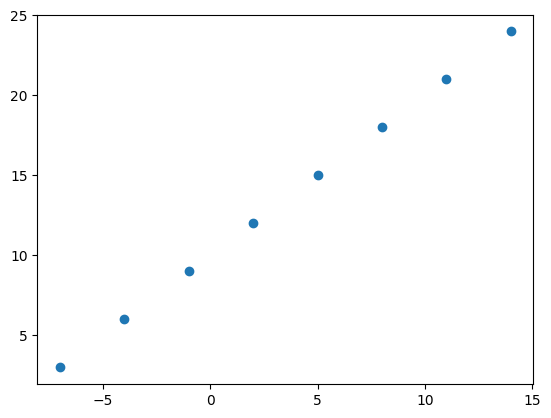

In [97]:
import numpy as np
import matplotlib.pyplot as plt
# create features i.e input features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0]) # independent variable x-axis. its called the fratures variable
X = np.array(X).reshape(-1, 1)

# create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0]) # dependent variable y axis or its the outcome variable

# visualize it
plt.scatter(X,y)

In [98]:
y==X+10


array([[ True, False, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False, False],
       [False, False, False,  True, False, False, False, False],
       [False, False, False, False,  True, False, False, False],
       [False, False, False, False, False,  True, False, False],
       [False, False, False, False, False, False,  True, False],
       [False, False, False, False, False, False, False,  True]])

# input and output shape

In [99]:
input_shape=X.shape
output_shape=y.shape
input_shape,output_shape # here the shape is 8. This array is 1-dimensional (1D) with a shape of (8,), meaning it contains 8 elements in a single row.



((8, 1), (8,))

In [100]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((1,), ())

In [101]:
X[0].ndim # so this is basically scalar having 0 dimention thats why it has no shape

1

In [102]:
X[0],y[0] # we are going to use one X value to predict one y value

(array([-7.]), np.float64(3.0))

#converting numpy into tensor

In [103]:
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [104]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([1]), TensorShape([]))

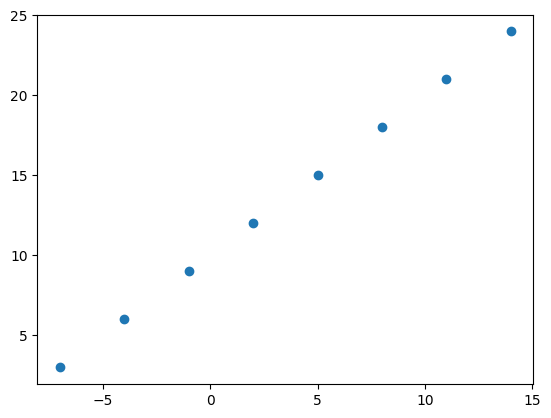

In [105]:
plt.scatter(X,y)

#steps in modeling with tensorflow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

Sequential groups a linear stack of layers into a Model.

Examples:

model = keras.Sequential()

model.add(keras.Input(shape=(16,)))

model.add(keras.layers.Dense(8))

:::ValueError::: Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)

The error indicates that the input data to the Dense layer does not meet the layer's requirement for a minimum of two dimensions (2D). A Dense layer expects inputs in the shape (batch_size, num_features), where num_features is the number of input features per sample.

Cause of the Issue:
>The input data X is likely a 1D array with a shape like (None,), which corresponds to a single feature without the batch dimension explicitly specified.

Solution:
>Need to reshape X into a 2D array before passing it to the model. You can do this using numpy or other methods, depending on how X is structured.


Ensure X is a 2D array:
>X = np.array(X).reshape(-1, 1)  # Reshape to (batch_size, num_features)

Fit the model:
>model.fit(X, y, epochs=5)

Explanation:
>np.array(X).reshape(-1, 1) ensures X has two dimensions, where:
-1 lets NumPy automatically infer the number of rows (batch size).
1 specifies the number of features per sample.

In [106]:
# set random seed
tf.random.set_seed(42)

# create a model using sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,  #loss = keras.losses.mean_absolute_error(y_true, y_pred)
              optimizer=tf.keras.optimizers.SGD(), # Stocastic gradient Descent
              metrics=["mae"])

# fit the model

model.fit(X,y,epochs=5)

# Fit the model
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line
# The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - loss: 18.0906 - mae: 18.0906
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 17.8094 - mae: 17.8094
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 17.5281 - mae: 17.5281
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 17.2469 - mae: 17.2469
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 16.9656 - mae: 16.9656


In [107]:
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

ValueError: Unrecognized data type: x=[17.0] (of type <class 'list'>)

The error occurs because model.predict expects the input data to be in a specific format, typically a NumPy array or a tensor with at least two dimensions (as required by the Dense layer). However, [17.0] is a Python list, which is not directly compatible.

Fix:
>Need to convert the input [17.0] into a 2D NumPy array or tensor with the proper shape. Here's how to fix it:

In [108]:
# make prediction by using our model
# model.predict([17.0])
# Convert the input to a 2D array
input_data = np.array([17.0]).reshape(-1, 1)

# Make the prediction
prediction = model.predict(input_data)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


array([[-12.793517]], dtype=float32)

In [109]:
X.ndim

2

Explanation of .reshape(-1, 1)
-1: This tells NumPy to infer the number of rows automatically based on the total number of elements in the array. In this case, since there are 8 elements, it infers 8 rows.
1: This explicitly sets the number of columns to 1, making it a 2D array with a single feature.

# Improving our model


In [110]:
# creating
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compiling
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - loss: 12.2005 - mae: 12.2005
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.0680 - mae: 12.0680
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.9355 - mae: 11.9355
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.8030 - mae: 11.8030
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 11.6705 - mae: 11.6705
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.5380 - mae: 11.5380
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.4055 - mae: 11.4055
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.2730 - mae: 11.2730
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.1405 - mae: 11.1405
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.0080 - mae: 11.0080
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.8755 - mae: 10.8755
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.7430 - mae: 10.7430
Epoch 13/100
1/1 ━━━━━━━

In [111]:
input_data = np.array([17.0]).reshape(-1, 1)
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[29.766808]], dtype=float32)

Changing optimizer and adding learning rate

In [112]:

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compiling
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

#fit
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step - loss: 11.3367 - mae: 11.3367
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 10.8867 - mae: 10.8867
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.4367 - mae: 10.4367
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.9867 - mae: 9.9867
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.5367 - mae: 9.5367
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.0867 - mae: 9.0867
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.6367 - mae: 8.6367
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.1867 - mae: 8.1867
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.7367 - mae: 7.7367
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.2867 - mae: 7.2867
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 6.8367 - mae: 6.8367
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.6750 - mae: 6.6750
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [113]:
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [114]:
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[27.104015]], dtype=float32)

Adding more hidden layer

In [115]:
# creating
model=tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation="relu")
])

#compiling
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

#fit
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.6581 - mae: 12.6581
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.3019 - mae: 12.3019
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.9457 - mae: 11.9457
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.5894 - mae: 11.5894
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.2814 - mae: 11.2814
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.0438 - mae: 11.0438
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.8457 - mae: 10.8457
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.7260 - mae: 10.7260
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.6368 - mae: 10.6368
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.5641 - mae: 10.5641
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.4970 - mae: 10.4970
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.4394 - mae: 10.4394
Epoch 13/100
1/1 ━━━━━━━━━━

In [116]:
input_data = np.array([17.0]).reshape(-1, 1)
model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[12.37205  ,  8.794327 ,  0.       ,  6.2242303,  0.       ,
         2.844684 ,  0.       , 17.155102 ]], dtype=float32)

#Evaluating a model
build->evaluate->tweak->evaluate->tweak->evaluate->tweak......

when it comes to evaluation we shoul memorize
> visualize, visualize, visualize


*   data
*   model
*   training
*   prediction




In [117]:
# Make a bigger dataset

X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [118]:
# make labels for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

# Spliting data into train and test sample

In [119]:
x_train=X[:40]
x_test=X[40:]
y_train=y[:40]
y_test=y[40:]
x_train,x_test,y_train,y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

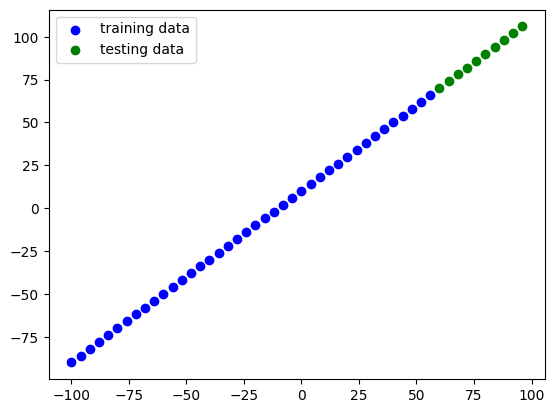

In [120]:
plt.scatter(x_train,y_train,c="b",label="training data")
plt.scatter(x_test,y_test,c="g",label="testing data")
plt.legend()

>**NOTE** The Dense layer in this model is configured with input_shape=[1], meaning it expects input data with 1 features per sample.

In [121]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

The parameters here represent the weights and bias.

number of Params=input*number of neurons (represent weight. one per neuron)+ number of neurons(bias)

In [123]:
# fit our model
model.fit(tf.reshape(x_train,shape=(-1,1)),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - loss: 16.0123 - mae: 16.0123
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 18.9587 - mae: 18.9587
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.4726 - mae: 12.4726
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.3923 - mae: 13.3923
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.8640 - mae: 7.8640
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.1620 - mae: 10.1620
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.3573 - mae: 7.3573
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.3798 - mae: 6.3798
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.3065 - mae: 5.3065
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.9695 - mae: 4.9695
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6598 - mae: 3.6598
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.0011 - mae: 4.0011
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 

#plot Model

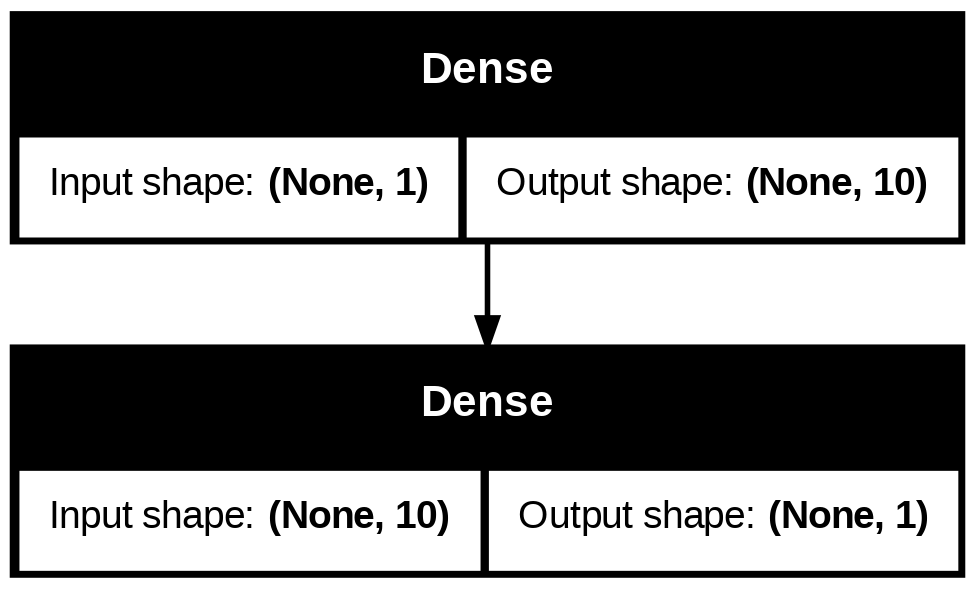

In [124]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

#Visualizing our model predictions
y_test vs y_pred or ground truth vs predicted

In [125]:
# Make some predictions
y_pred=model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[ 69.19757 ],
       [ 73.13351 ],
       [ 77.06943 ],
       [ 81.00536 ],
       [ 84.941284],
       [ 88.87721 ],
       [ 92.81315 ],
       [ 96.74907 ],
       [100.685   ],
       [104.620926]], dtype=float32)

In [126]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

#plotting function

In [127]:
def plot_prediction(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predictions=y_pred):
  plt.figsize=(10,7)
  plt.scatter(train_data,train_labels,c="b",label='training data')
  plt.scatter(test_data,test_labels,c="g",label="testing data")
  plt.scatter(test_data,predictions,c="r",label="predictions")
  plt.legend()

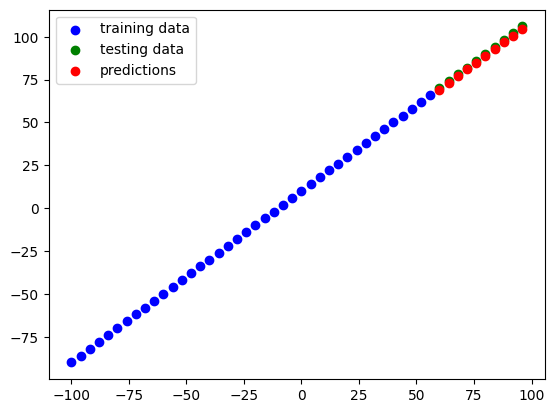

In [128]:
plot_prediction(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predictions=y_pred)

#Evaluating our model's prediction with regression evaluation metrics
Mean Square Error and Mean Absoulte Error

In [129]:
model.evaluate(x_test,y_test) #Returns the loss value & metrics values for the model in test mode

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 1.0907 - mae: 1.0907


[1.0907493829727173, 1.0907493829727173]

In [130]:
tf.keras.metrics.mae(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.8024292 , 0.8664932 , 0.9305725 , 0.99463654, 1.0587158 ,
       1.1227875 , 1.1868515 , 1.2509308 , 1.3150024 , 1.3790741 ],
      dtype=float32)>

#Shape Mismatch Between y_test and y_pred:

The y_test and y_pred tensors must have the same shape. If they don't, TensorFlow will attempt to broadcast them, leading to incorrect results.
Ensure both tensors are 1D or have compatible shapes for element-wise subtraction.


In [131]:
tf.keras.metrics.mse(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.64389265, 0.7508105 , 0.8659652 , 0.98930186, 1.1208792 ,
       1.2606517 , 1.4086165 , 1.5648278 , 1.7292315 , 1.9018453 ],
      dtype=float32)>

In [132]:
tf.keras.metrics.huber(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.32194632, 0.37540525, 0.4329826 , 0.49465093, 0.5587158 ,
       0.6227875 , 0.6868515 , 0.7509308 , 0.81500244, 0.8790741 ],
      dtype=float32)>

In [133]:
y_pred,y_pred.shape # lets change its shape.

(array([[ 69.19757 ],
        [ 73.13351 ],
        [ 77.06943 ],
        [ 81.00536 ],
        [ 84.941284],
        [ 88.87721 ],
        [ 92.81315 ],
        [ 96.74907 ],
        [100.685   ],
        [104.620926]], dtype=float32),
 (10, 1))

In [134]:
y_test,y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 69.19757 ],
        [ 73.13351 ],
        [ 77.06943 ],
        [ 81.00536 ],
        [ 84.941284],
        [ 88.87721 ],
        [ 92.81315 ],
        [ 96.74907 ],
        [100.685   ],
        [104.620926]], dtype=float32))

In [135]:
y_test,tf.squeeze(y_pred)


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.19757 ,  73.13351 ,  77.06943 ,  81.00536 ,  84.941284,
         88.87721 ,  92.81315 ,  96.74907 , 100.685   , 104.620926],
       dtype=float32)>)

In [136]:
mae_1=tf.metrics.mae(y_test,tf.squeeze(y_pred))
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=1.0907493829727173>

In [137]:
mse_1=tf.metrics.mse(y_test,tf.squeeze(y_pred))
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=1.2236021757125854>

# Running experiment to improve our model




1.   Get More data
2.   Making model larger
3.   Train for longer

lets make 3 model with different NN and epochs


In [138]:
# model 1. same as above

In [139]:
# model 2
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])
model_2.fit(x_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step - loss: 11.0867 - mae: 11.0867
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 14.4586 - mae: 14.4586 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 16.1543 - mae: 16.1543
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 17.3960 - mae: 17.3960
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.9256 - mae: 7.9256 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.9946 - mae: 10.9946
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.2629 - mae: 10.2629
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.6423 - mae: 5.6423
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.2646 - mae: 10.2646
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.0664 - mae: 6.0664
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.3163 - mae: 6.3163
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.1618 - mae: 6.1618
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


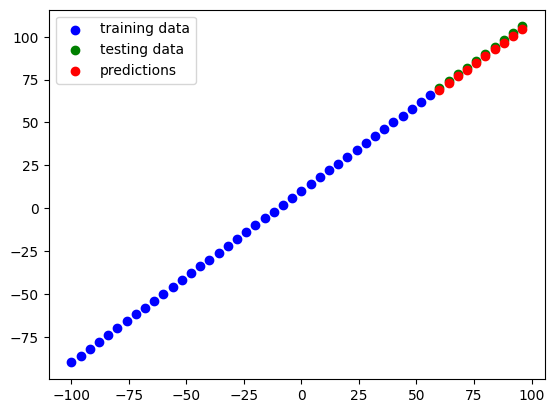

In [140]:
y_pred=model_2.predict(x_test)
plot_prediction(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predictions=y_pred)

In [141]:
#  model_3
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])
model_3.fit(x_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - loss: 69.0331 - mae: 69.0331
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 26.0480 - mae: 26.0480
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 14.8317 - mae: 14.8317
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 18.3216 - mae: 18.3216
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.6397 - mae: 9.6397
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 13.0930 - mae: 13.0930
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.4536 - mae: 9.4536
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.2266 - mae: 13.2266
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.2164 - mae: 5.2164
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.5237 - mae: 14.5237
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.9749 - mae: 5.9749
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.0798 - mae: 12.0798
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


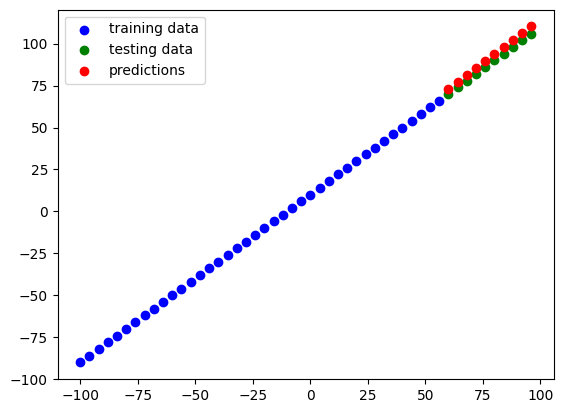

In [142]:
y_pred=model_3.predict(x_test)
plot_prediction(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predictions=y_pred)

In [143]:
mae_3=tf.metrics.mae(y_test,tf.squeeze(y_pred))
mse_3=tf.metrics.mse(y_test,tf.squeeze(y_pred))
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=3.4247589111328125>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.969079971313477>)

# compare model using pandas dataframe

In [144]:
import pandas as pd
model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]
results=pd.DataFrame(model_results,columns=["model","mae","mse"])
results

,model,mae,mse
0,model_1,1.090749,1.223602
1,model_3,3.424759,11.969080


#saving our models


1.   saved model format
2.   HDF5 format



In [145]:
model_2.save("path_to_save_model.h5")


In [146]:
#loading model
loaded_h5_model=tf.keras.models.load_model("path_to_save_model.h5")
loaded_h5_model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [147]:
model_2.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

#Downloading files from google colab.


1.   click on right side to download
2.   import google files code to download



In [148]:
from google.colab import files
files.download("path_to_save_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A larger example
 larger dataset

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [150]:
# read in the insurane dataset
insurance=pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [151]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [152]:
insurance['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [153]:
insurance['bmi'].dtype

dtype('float64')

#one hot encoding our dataframe

In [154]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [155]:
insurance_one_hot["sex_female"].dtype

dtype('bool')

In [156]:
insurance_one_hot["age"]

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [157]:
# split dataset
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]


In [158]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [159]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


create training and testing sets by sklern

In [160]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [161]:
import tensorflow as tf
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10078.8027 - mae: 10078.8027
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7651.4565 - mae: 7651.4565
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7389.5298 - mae: 7389.5298
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7367.5361 - mae: 7367.5361
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7386.2339 - mae: 7386.2339
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7532.3672 - mae: 7532.3672
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7589.4111 - mae: 7589.4111
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7268.4556 - mae: 7268.4556
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7592.1162 - mae: 7592.1162
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7880.3726 - mae: 7880.3726
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7375.8745 - mae: 7375.8745
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [162]:
y_pred=insurance_model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Lets evaluate our model

In [163]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9455.0615 - mae: 9455.0615


[9171.4013671875, 9171.4013671875]

In [164]:
y_train.mean(
)

np.float64(13346.089736364485)

#improving our model

In [165]:
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=["mae"])
history=insurance_model_2.fit(X_train,y_train,epochs=200,verbose=1)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 12479.8809 - mae: 12479.8809
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7504.9229 - mae: 7504.9229
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7226.3887 - mae: 7226.3887
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7000.6504 - mae: 7000.6504
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6692.6626 - mae: 6692.6626
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6359.5664 - mae: 6359.5664
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6223.0571 - mae: 6223.0571
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6084.9634 - mae: 6084.9634
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5924.4214 - mae: 5924.4214
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5712.0625 - mae: 5712.0625
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5429.5845 - mae: 5429.5845
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

In [166]:
insurance_model_2.evaluate(X_test,y_test
                           )

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3225.2781 - mae: 3225.2781


[3162.1494140625, 3162.1494140625]

#Losss curve or training curve

Text(0.5, 0, 'epochs')

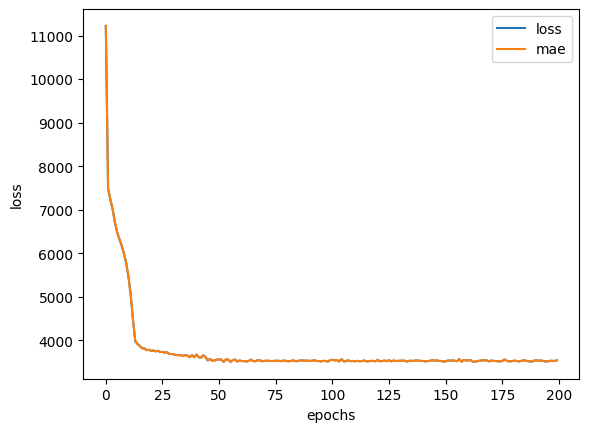

In [167]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> So How long do you train for? for this, tensorflow has a solution. i.e. EarlyStoppingCallback which is a tensorflow component which can be add in our model to stop training when our model stop improving after certain metric.

# Preprocessing data. Normalization and standardisation
in terms of scaling values NN prefers normalization
To prepare out data. we can burrow a few classes from sikit-learn


<Axes: ylabel='Frequency'>

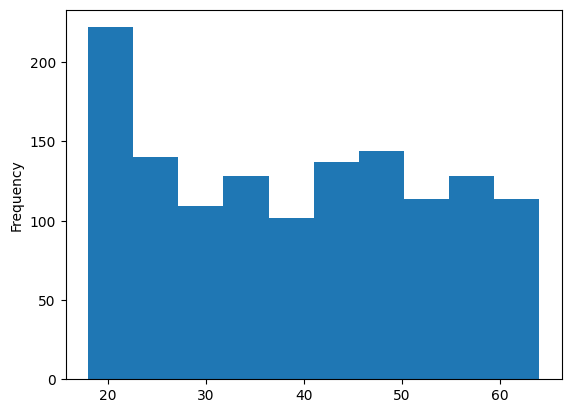

In [168]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

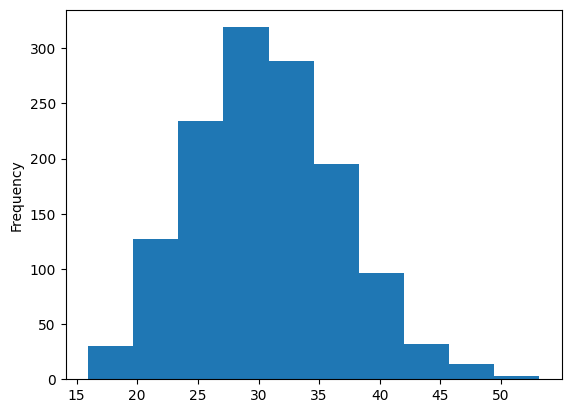

In [169]:
X["bmi"].plot(kind="hist")

#Correct Syntax for ColumnTransformer
When creating a ColumnTransformer, its components should be passed as a list of tuples inside the constructor. Each tuple contains:

A name for the transformer (e.g., "scaler" or "onehot").

The transformer object (e.g., MinMaxScaler() or OneHotEncoder()).

The column names to which the transformer should be applied.

In [170]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Creating a column transformer
ct = ColumnTransformer(
    transformers=[
        ("scaler", MinMaxScaler(), ["age", "bmi", "children"]),  # Scale these columns
        ("onehot", OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])  # One-hot encode these columns
    ]
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer on training data
ct.fit(X_train)

# Transform the training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [171]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [172]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [173]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [174]:
X_train.shape,X_train_normal.shape # columns are added by one hot encoder

((1070, 6), (1070, 11))

Our data is normalized and one hot encoded. lets build our neural network based on this data

In [175]:
tf.random.set_seed(42)
insurance_model_normalized=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_normalized.compile(loss=tf.keras.losses.mae,
                                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                                   metrics=["mae"])
history=insurance_model_normalized.fit(X_train_normal,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 13251.1094 - mae: 13251.1094
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12046.3350 - mae: 12046.3350
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8372.3486 - mae: 8372.3486
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7595.1548 - mae: 7595.1548
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7137.5107 - mae: 7137.5107
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6541.1235 - mae: 6541.1235
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5665.5850 - mae: 5665.5850
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4475.7764 - mae: 4475.7764
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3717.0640 - mae: 3717.0640
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3639.4988 - mae: 3639.4988
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3623.8474 - mae: 3623.8474
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

Text(0.5, 0, 'epochs')

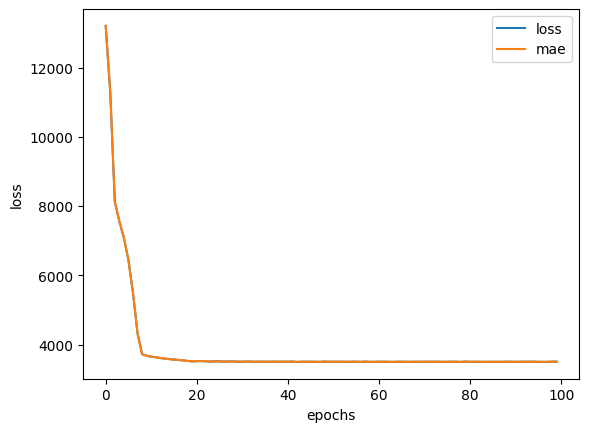

In [176]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [177]:
insurance_model_normalized.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3219.7971 - mae: 3219.7971


[3166.031982421875, 3166.031982421875]

In [178]:
X_test_normal[0]

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [179]:
single_sample = X_test_normal[0].reshape(1, -1)  # -1 infers the size (11)
prediction = insurance_model_normalized.predict(single_sample)
print("Prediction for the first test sample:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Prediction for the first test sample: 9051.852


# Saving and loading model

In [180]:
import pickle
with open("insurance_model.pkl","wb") as f:
  pickle.dump(insurance_model_normalized,f)

In [196]:
with open("insurance_model.pkl","rb") as f:
  loaded_model=pickle.load(f)

In [197]:
loaded_model_prediction=loaded_model.predict(single_sample)
loaded_model_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[9159.329]], dtype=float32)

In [198]:
insurance_model_normalized.predict(single_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[9051.852]], dtype=float32)

In [183]:
insurance_model_2.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [184]:
insurance_model_normalized.summary(

)

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)

In [185]:
import pandas as pd
# age	sex	bmi	children	smoker	region
age=int(input("enter age: "))
sex=input("enter sex: ")
bmi=float(input("enter bmi: "))
children=int(input("enter children: "))
smoker=input("enter smoker: ")
region=input("enter region: ")
input_df=pd.DataFrame([[age,sex,bmi,children,smoker,region]],columns=["age","sex","bmi","children","smoker","region"])
input_df

enter age: 23
enter sex: male
enter bmi: 33
enter children: 1
enter smoker: no
enter region: southwest


,age,sex,bmi,children,smoker,region
0,23,male,33.0,1,no,southwest


In [192]:
X_test.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object


In [193]:
input_df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object


In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Creating a column transformer
ct = ColumnTransformer(
    transformers=[
        ("scaler", MinMaxScaler(), ["age", "bmi", "children"]),  # Scale these columns
        ("onehot", OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])  # One-hot encode these columns
    ]
)
ct.fit(X_train)
# Transform the user input data
user_data_norm = ct.transform(input_df)


In [195]:
user_data_norm

array([[0.10869565, 0.45843422, 0.2       , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [206]:
insurance_premium=insurance_model_normalized.predict(user_data_norm)
float(insurance_premium[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


2316.731201171875